# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
#to print entire numpy array

# Importing datasets

Training Set

In [ ]:
df1 = pd.read_csv('/content/house price_train.csv')
x1 = df1.iloc[: , :-1]
y1 = df1.iloc[: , -1]

Test Set

In [ ]:
df2 = pd.read_csv('/content/house price_test.csv')

Combining test and train set for feature engineering.

In [ ]:
df = pd.concat([x1 , df2])

# Viewing data info

In [ ]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df1.shape

(1460, 81)

In [ ]:
df2.shape

(1459, 80)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Checking Correlation

<ipython-input-11-08bbea0cd8e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr())
<ipython-input-11-08bbea0cd8e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr().T.SalePrice.sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

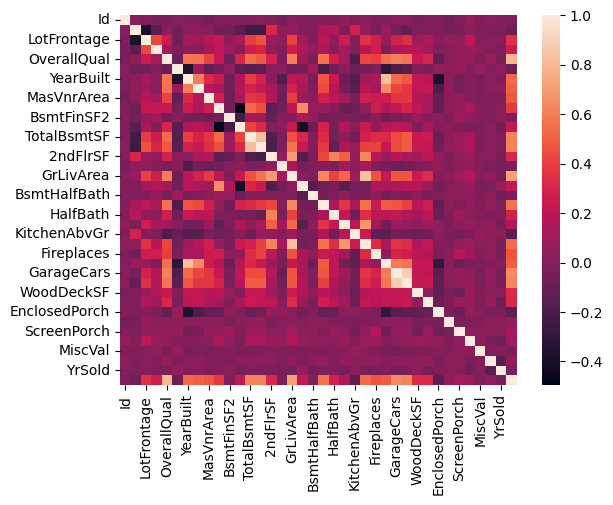

In [ ]:
sns.heatmap(df1.corr())
df1.corr().T.SalePrice.sort_values(ascending=False)

# Working with null values

We see that some attributes have null values. We will list them.

In [ ]:
null_cols = df1.columns[df1.isna().any()].tolist()
for column in null_cols:
  print(column , "\t:\t" , df1[column].dtype , "\t:\t" , df1[column].isna().sum())

LotFrontage 	:	 float64 	:	 259
Alley 	:	 object 	:	 1369
MasVnrType 	:	 object 	:	 8
MasVnrArea 	:	 float64 	:	 8
BsmtQual 	:	 object 	:	 37
BsmtCond 	:	 object 	:	 37
BsmtExposure 	:	 object 	:	 38
BsmtFinType1 	:	 object 	:	 37
BsmtFinType2 	:	 object 	:	 38
Electrical 	:	 object 	:	 1
FireplaceQu 	:	 object 	:	 690
GarageType 	:	 object 	:	 81
GarageYrBlt 	:	 float64 	:	 81
GarageFinish 	:	 object 	:	 81
GarageQual 	:	 object 	:	 81
GarageCond 	:	 object 	:	 81
PoolQC 	:	 object 	:	 1453
Fence 	:	 object 	:	 1179
MiscFeature 	:	 object 	:	 1406


We shall drop columns with large number of na.

In [ ]:
cols_drop = [col for col in df.columns if df[col].isna().sum() > 700]
df = df.drop(cols_drop , axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

Filling in the null values

In [ ]:
cat_cols = [col for col in df.columns if type(df[col]) == object]
num_cols = [col for col in df.columns if type(df[col]) != object]

In [ ]:
df[num_cols] = df[num_cols].fillna(0)
df[cat_cols] = df[cat_cols].fillna("None")

# Visualising data

Visualising density of SalePrice attribute

<ipython-input-17-e76905057710>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

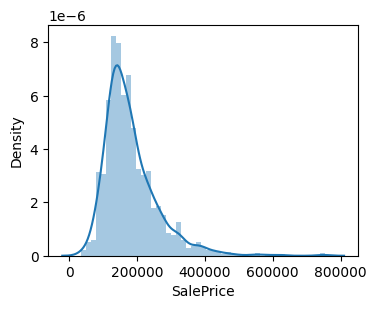

In [ ]:
plt.figure(figsize = (4 , 3))
sns.distplot(df1['SalePrice'])

Selecting numerical attributes and visualising density

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

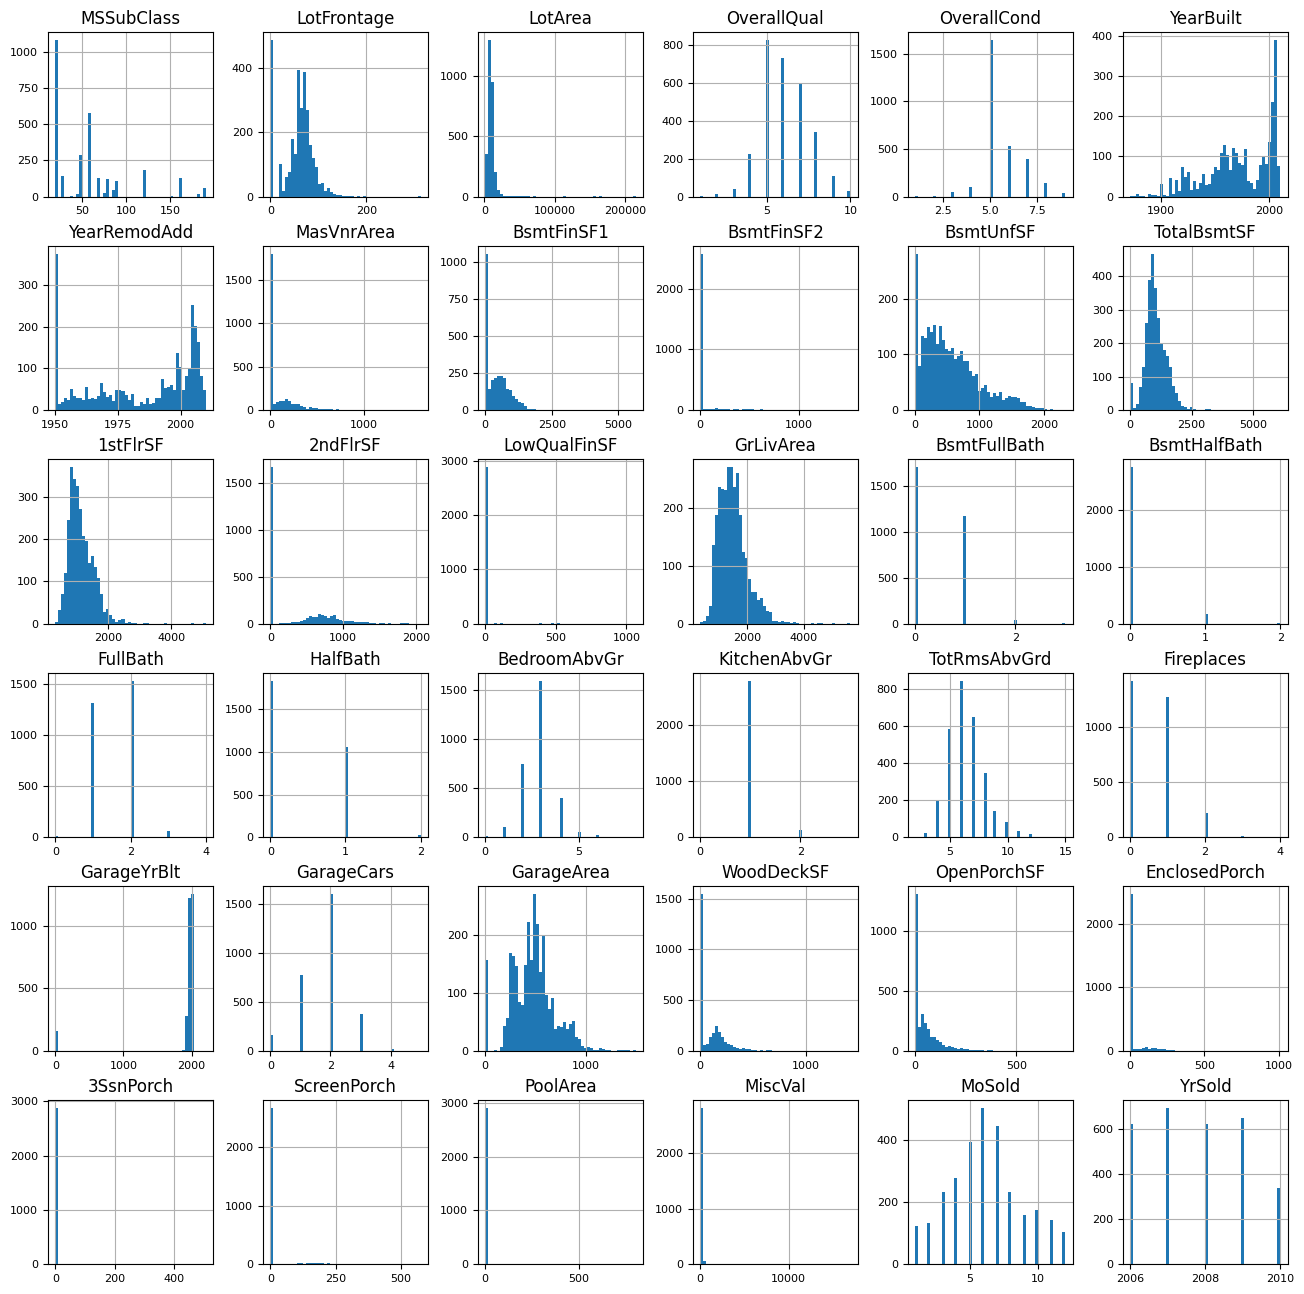

In [ ]:
(df[num_cols].drop("Id" , axis = 1)).hist(figsize = (16 , 16) , bins = 50 , xlabelsize = 8 , ylabelsize = 8)

# Feature Engineering

Joining some Features

In [ ]:
# Total House Area
df['TotalSF']      = df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF']
# Years passed after the last reconstruction
df['YrAfterRemod'] = df['YrSold']   - df['YearRemodAdd']
# House Age
df['AgeSold']      = df['YrSold']   - df['YearBuilt']
#Total Bathrooms
df["TotalBath"] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']
#Porch Area
df["TotalPorch"] = df['WoodDeckSF'] + df['OpenPorchSF'] +df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

Dropping some other attributes which may not be very relevant

In [ ]:
cols_drop = ["1stFlrSF" , "2ndFlrSF" , "YrSold" , "YearRemodAdd" , "YearBuilt" , "LowQualFinSF" ,'Exterior2nd' , 'BsmtFinSF1' , 'BsmtFinSF2' , 'BsmtUnfSF' , 'KitchenQual' ,'WoodDeckSF' , 'OpenPorchSF' , 'EnclosedPorch' , '3SsnPorch' , 'ScreenPorch' , 'MoSold' , 'BsmtFullBath' , 'BsmtHalfBath' , 'FullBath' , 'HalfBath' , 'GarageYrBlt' , 'GarageQual']
df = df.drop(cols_drop , axis = 1)
#coincidentally , we see that most of these dropped columns also have low correlation values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  RoofStyl

# Encoding categorical columns

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,GrLivArea,BedroomAbvGr,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,196.0,856.0,1710,3,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,0.0,1262.0,1262,3,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,162.0,920.0,1786,3,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,0.0,756.0,1717,3,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,350.0,1145.0,2198,4,...,0,0,0,1,0,0,0,0,1,0


# Separating dataframe into train and test data after feature engineering

In [ ]:
final_train = pd.concat([df.iloc[:1460 , :] , y1] , axis = 1)
final_test = df.iloc[1460: , :]

In [ ]:
final_train.tail()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,GrLivArea,BedroomAbvGr,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
1455,1456,60,62.0,7917,6,5,0.0,953.0,1647,3,...,0,0,1,0,0,0,0,1,0,175000
1456,1457,20,85.0,13175,6,6,119.0,1542.0,2073,3,...,0,0,1,0,0,0,0,1,0,210000
1457,1458,70,66.0,9042,7,9,0.0,1152.0,2340,4,...,0,0,1,0,0,0,0,1,0,266500
1458,1459,20,68.0,9717,5,6,0.0,1078.0,1078,2,...,0,0,1,0,0,0,0,1,0,142125
1459,1460,20,75.0,9937,5,6,0.0,1256.0,1256,3,...,0,0,1,0,0,0,0,1,0,147500


In [ ]:
final_train.shape

(1460, 247)

In [ ]:
final_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,GrLivArea,BedroomAbvGr,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,0.0,882.0,896,2,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,108.0,1329.0,1329,3,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,0.0,928.0,1629,3,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,20.0,926.0,1604,3,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,0.0,1280.0,1280,2,...,0,0,0,1,0,0,0,0,1,0


# Splitting training data into train & test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(final_train.iloc[: , :-1] , y1 , test_size = 0.2 , random_state = 2)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
final_test = sc.transform(final_test)

# Building Models

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor(random_state = 1)
dtree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfor_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfor_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

Support Vector Regression

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'linear')
svr_reg.fit(x_train, y_train)

SVR(kernel='linear')

Gradient Boost Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 500)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=500)

# Predicting splitted test set values

Linear Regression

In [ ]:
y_pred1 = lin_reg.predict(x_test)

Decision Tree

In [ ]:
y_pred2 = dtree_reg.predict(x_test)

Random Forest

In [ ]:
y_pred3 = rfor_reg.predict(x_test)

Support Vector Regression

In [ ]:
y_pred4 = svr_reg.predict(x_test)

Gradient Boost Regressor

In [ ]:
y_pred5 = gbr.predict(x_test)

# Accuracy Score

In [ ]:
from sklearn.metrics import r2_score

Linear Regression

In [ ]:
r2_score(y_test, y_pred1)

-1.4680779561732231e+25

Decision Tree

In [ ]:
r2_score(y_test, y_pred2)

0.8117549872109344

Random Forest

In [ ]:
r2_score(y_test, y_pred3)

0.9097672022665194

SVR

In [ ]:
r2_score(y_test, y_pred4)

0.17555062863787319

Gradient Boost Regressor

In [ ]:
r2_score(y_test , y_pred5)

0.9255898683731532

Thus we see that the Gradient Boost Regressor is giving us the best test results.

# Visualising test results

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(292 , 1) , np.array(y_test).reshape(292 , 1)) , 1))

[[247602.6  289000.  ]
 [180382.45 178000.  ]
 [294455.65 359100.  ]
 [218182.94 197000.  ]
 [199021.29 224000.  ]
 [221436.37 221000.  ]
 [220667.35 227000.  ]
 [194264.87 201000.  ]
 [150497.98  84500.  ]
 [355381.56 315000.  ]
 [198578.12 215000.  ]
 [192570.33 207000.  ]
 [ 99135.   118000.  ]
 [140272.55 147000.  ]
 [109513.59 105000.  ]
 [251039.92 225000.  ]
 [266596.35 287000.  ]
 [308052.22 284000.  ]
 [210483.76 240000.  ]
 [314814.86 285000.  ]
 [350673.97 310000.  ]
 [170429.28 172500.  ]
 [174744.19 174000.  ]
 [230777.62 222000.  ]
 [423923.7  438780.  ]
 [233868.13 260400.  ]
 [163467.03 110000.  ]
 [271656.09 262280.  ]
 [217501.17 204000.  ]
 [439045.79 437154.  ]
 [338025.56 315500.  ]
 [168876.28 155000.  ]
 [287601.59 290000.  ]
 [128317.08 124000.  ]
 [186676.71 176500.  ]
 [227676.36 212000.  ]
 [128287.93 132000.  ]
 [309068.93 348000.  ]
 [335398.74 350000.  ]
 [378210.61 423000.  ]
 [164272.5  173000.  ]
 [187170.37 217500.  ]
 [147334.97 152000.  ]
 [ 92878.27

# Predicting test set results

In [ ]:
y_pred = gbr.predict(final_test)

# Creating the output csv

Making the dataframe

In [ ]:
df = pd.read_csv('/content/house price_test.csv')
a1 = np.array(df['Id'])
arr = np.concatenate((a1.reshape(len(y_pred),1) , np.array(y_pred).reshape(len(y_pred) , 1)) , 1)
output_df = pd.DataFrame(arr , columns = ['Id' , 'SalePrice'])
output_df = output_df.astype({'Id' : int})
output_df.head()

,Id,SalePrice
0,1461,126752.487950
1,1462,168933.043938
2,1463,176205.942577
3,1464,192858.468870
4,1465,207772.611239


DataFrame to csv

In [ ]:
output_df.to_csv('houseprice_output.csv', index=False)